#**Assign 1 - Dolev Benhous**  
###ID-208426528


#**Data Exploration**

##**A.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['mushrooms.csv']))
df


##**B.**

###checking the data properties.

In [ ]:
df.info()

##**C.**

##**one-hot-encoding**

###turning categorial data to numeric data

In [5]:
# Copy the original data
D = df.copy()

D = pd.get_dummies(D)
D

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


###another way to switch data to numeric.

##**label coding**

In [6]:
#from google.colab import files
#uploaded = files.upload()

# import required libraries
import pandas as pd
import numpy as np

# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'class'. 
df['class']= label_encoder.fit_transform(df['class']) 

# Encode labels in all columns 
df['cap-shape']= label_encoder.fit_transform(df['cap-shape']) 
df['cap-surface']= label_encoder.fit_transform(df['cap-surface']) 
df['cap-color']= label_encoder.fit_transform(df['cap-color']) 
df['bruises']= label_encoder.fit_transform(df['bruises']) 
df['odor']= label_encoder.fit_transform(df['odor']) 
df['gill-attachment']= label_encoder.fit_transform(df['gill-attachment']) 
df['gill-spacing']= label_encoder.fit_transform(df['gill-spacing']) 
df['gill-size']= label_encoder.fit_transform(df['gill-size']) 
df['gill-color']= label_encoder.fit_transform(df['gill-color']) 
df['stalk-shape']= label_encoder.fit_transform(df['stalk-shape']) 
df['stalk-root']= label_encoder.fit_transform(df['stalk-root']) 
df['stalk-surface-above-ring']= label_encoder.fit_transform(df['stalk-surface-above-ring']) 
df['stalk-surface-below-ring']= label_encoder.fit_transform(df['stalk-surface-below-ring']) 
df['stalk-color-above-ring']= label_encoder.fit_transform(df['stalk-color-above-ring']) 
df['stalk-color-below-ring']= label_encoder.fit_transform(df['stalk-color-below-ring']) 
df['veil-type']= label_encoder.fit_transform(df['veil-type']) 
df['veil-color']= label_encoder.fit_transform(df['veil-color']) 
df['ring-number']= label_encoder.fit_transform(df['ring-number']) 
df['ring-type']= label_encoder.fit_transform(df['ring-type']) 
df['spore-print-color']= label_encoder.fit_transform(df['spore-print-color']) 
df['population']= label_encoder.fit_transform(df['population']) 
df['habitat']= label_encoder.fit_transform(df['habitat']) 
df



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


*This is the only way that worked for me,not the fsatest way but works great* 

##**D.**

#**plots**
###first we show the features



In [7]:
features = df.columns[1:].tolist()
print(features, len(features))

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 22


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency 
from sklearn.preprocessing  import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score
import warnings

In [9]:
colors = ["#ED3E2F", "#85BB65"]
magma = sns.color_palette("magma")
magma_palette = sns.color_palette("magma")
def hide_spines(ax, spines=["top", "right", "left", "bottom"]):
    for spine in spines:
        ax.spines[spine].set_visible(False)

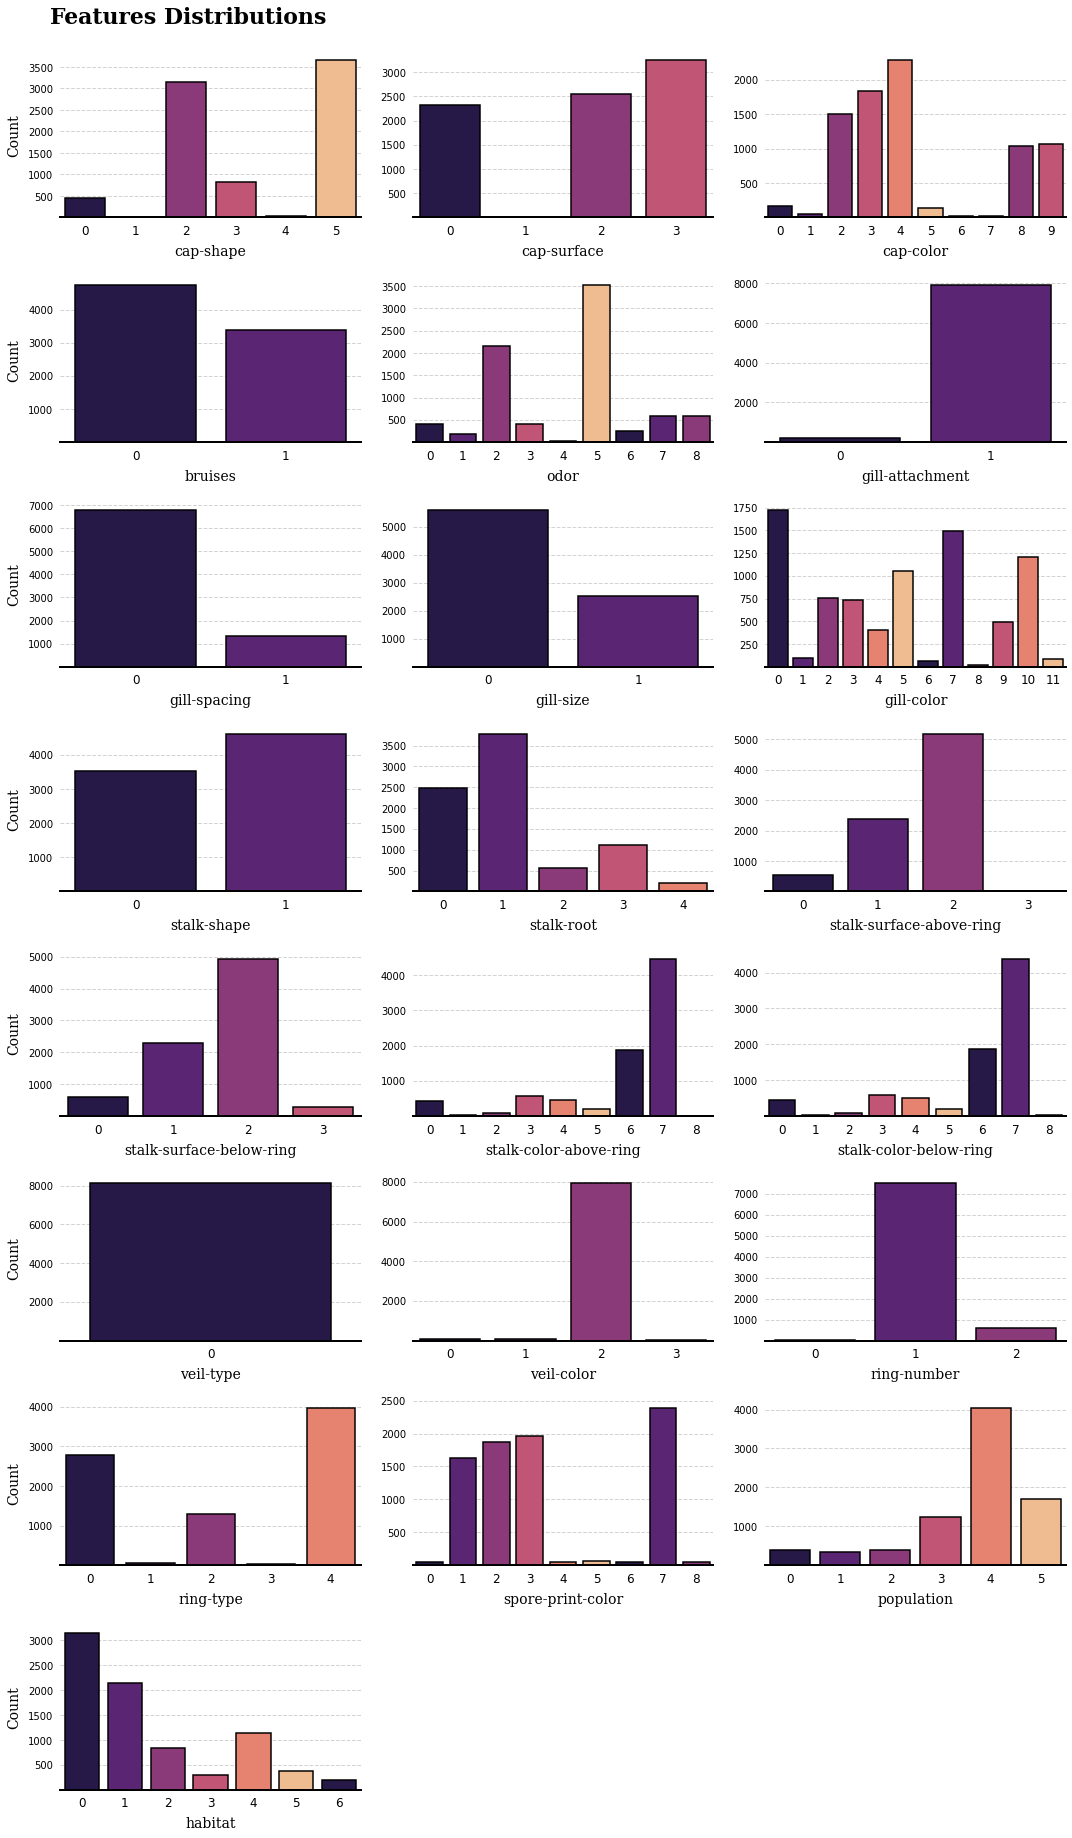

In [10]:
rows = 8
cols = 3
fig = plt.figure(figsize=(15, 25))
fig.set_facecolor("#fff")
for idx, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette=magma_palette, data=df, ec="#000", alpha=1, linewidth=1.5, zorder=2)
    ax.xaxis.set_tick_params(size=0, labelsize=12, pad=7)
    ax.yaxis.set_tick_params(size=0, labelsize=10, pad=7)
    
    if idx % cols == 0:
        ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)
    else:
        ax.set_ylabel("")
        
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    hide_spines(ax, spines=["top", "right", "left"])
    ax.spines["bottom"].set(linewidth=2)
    ax.set_ylim(1)

fig.text(x=0.05, y=1.01, s="Features Distributions", fontsize=22, fontweight="bold", fontfamily="serif")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

##**E.**

##**Missing Data**

In [11]:
#We should check if there is any null values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

###as we see there is no missing data. 

##**F.**

##**Correlation**

###we build correlation matrix to see which features affected are most effected

In [12]:
#corr table
df.corr()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

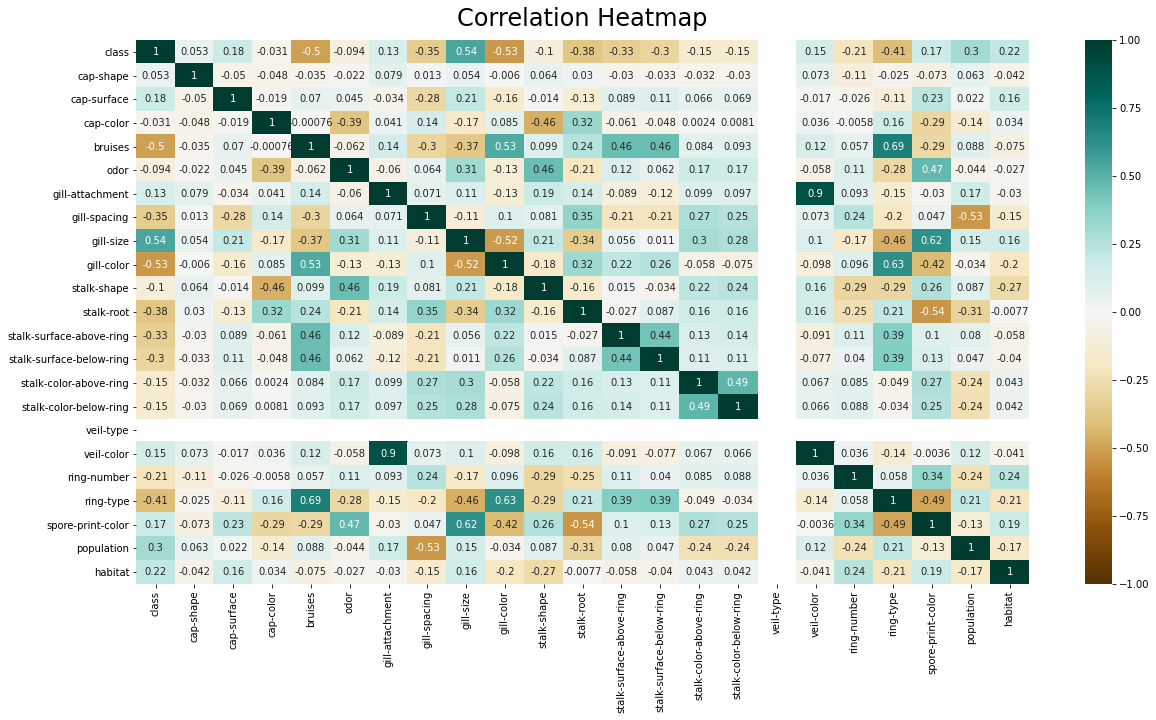

In [13]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=14);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=500, bbox_inches='tight')

As we see the feature with the higher influence on mushroom eatable.

Now i will check what prorably help us to know the reason.

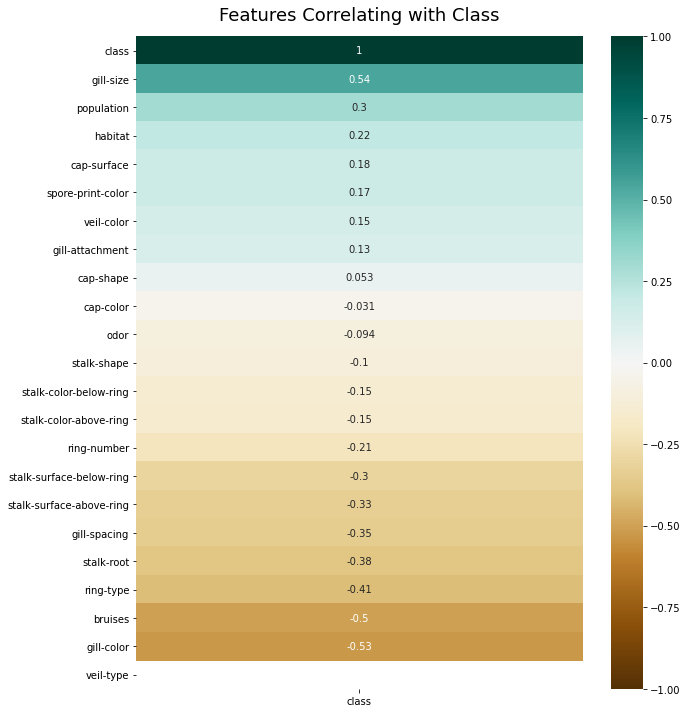

In [14]:
df.corr()[['class']].sort_values(by='class', ascending=False)
plt.figure(figsize=(10, 12))
heatmap = sns.heatmap(df.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize':18}, pad=16);


In [15]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##we chose the most relevant featurs.

In [16]:
wow = df[["class", "gill-size", "population", "habitat", "cap-surface", "spore-print-color", "veil-color", "gill-attachment"]]
wow

,class,gill-size,population,habitat,cap-surface,spore-print-color,veil-color,gill-attachment
0,1,1,3,5,2,2,2,1
1,0,0,2,1,2,3,2,1
2,0,0,2,3,2,3,2,1
3,1,1,3,5,3,2,2,1
4,0,0,0,1,2,3,2,1
...,...,...,...,...,...,...,...,...
8119,0,0,1,2,2,0,1,0
8120,0,0,4,2,2,0,0,0
8121,0,0,1,2,2,0,1,0
8122,1,1,4,2,3,7,2,1


##**G.**

##inference

I predict that the most effected featurs are first seven features on 'class' table


#**Model Development**

split the data using train test split 

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Let's say we want to split the data in 70:15:15 for train:valid:test dataset
train_size=0.7

X = wow.drop(columns = ['class']).copy()
y = wow['class']

# In the first step we will split the data in training and remaining dataset
X_wtrain, X_rem, y_wtrain, y_rem = train_test_split(X,y, train_size=0.7)

# Now since we want the valid and test size to be equal (15% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_wvalid, X_wtest, y_wvalid, y_wtest = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_wtrain.shape), print(y_wtrain.shape)
print(X_wvalid.shape), print(y_wvalid.shape)
print(X_wtest.shape), print(y_wtest.shape)

(5686, 7)
(5686,)
(1219, 7)
(1219,)
(1219, 7)
(1219,)


(None, None)

another option to split data with label encoding. 


In [27]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_wtrain, y_wtrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
# Training the K Nearest Neighbor Classification on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(X_wtrain, y_wtrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
%matplotlib inline

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=5)
classifierDT.fit(X_train, y_train)
train_accuracy = classifierDT.score(X_train, y_train)
test_accuracy = classifierDT.score(X_valid, y_valid)
print('Train accuracy={0}, Valid accuracy={1}, Difference: {2}'.format(train_accuracy, test_accuracy, abs(test_accuracy-train_accuracy)))

Train accuracy=0.9810059795990151, Valid accuracy=0.9745693191140279, Difference: 0.0064366604849872555


We will compare KNN, Decision Tree and Random Forest.

In [30]:
all_x = wow[["gill-size", "population", "habitat", "cap-surface", "spore-print-color", "veil-color", "gill-attachment"]]
all_y = wow['class']

In [31]:
scores = pd.DataFrame(columns=['train accuracy','validation accuracy','test accuracy'],index=['knn','tree','forest'])
print(scores)

       train accuracy validation accuracy test accuracy
knn               NaN                 NaN           NaN
tree              NaN                 NaN           NaN
forest            NaN                 NaN           NaN


In [36]:
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

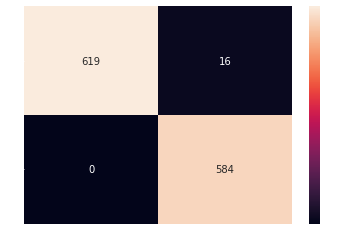

In [37]:
neigh = KNeighborsClassifier()
neigh.fit(X_wtrain, y_wtrain)
scores.at['knn','train accuracy'] = neigh.score(X_wtrain, y_wtrain)
scores.at['knn','validation accuracy'] = neigh.score( X_wvalid,y_wvalid)
scores.at['knn','test accuracy'] = neigh.score( X_wtest,y_wtest)

conf = confusion_matrix(y_wtest,neigh.predict(X_wtest))
sns.heatmap(conf, annot=True, fmt="d")

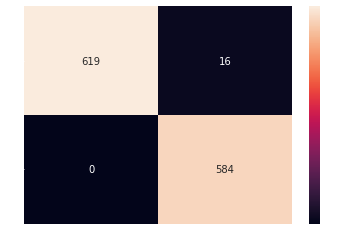

In [38]:
tree = DecisionTreeClassifier()
tree.fit(X_wtrain, y_wtrain)
scores.at['tree','train accuracy'] = tree.score(X_wtrain, y_wtrain)
scores.at['tree','validation accuracy'] = neigh.score( X_wvalid,y_wvalid)
scores.at['tree','test accuracy'] = tree.score(X_wtest, y_wtest)

conf = confusion_matrix(y_wtest, tree.predict(X_wtest))
sns.heatmap(conf, annot=True, fmt="d")

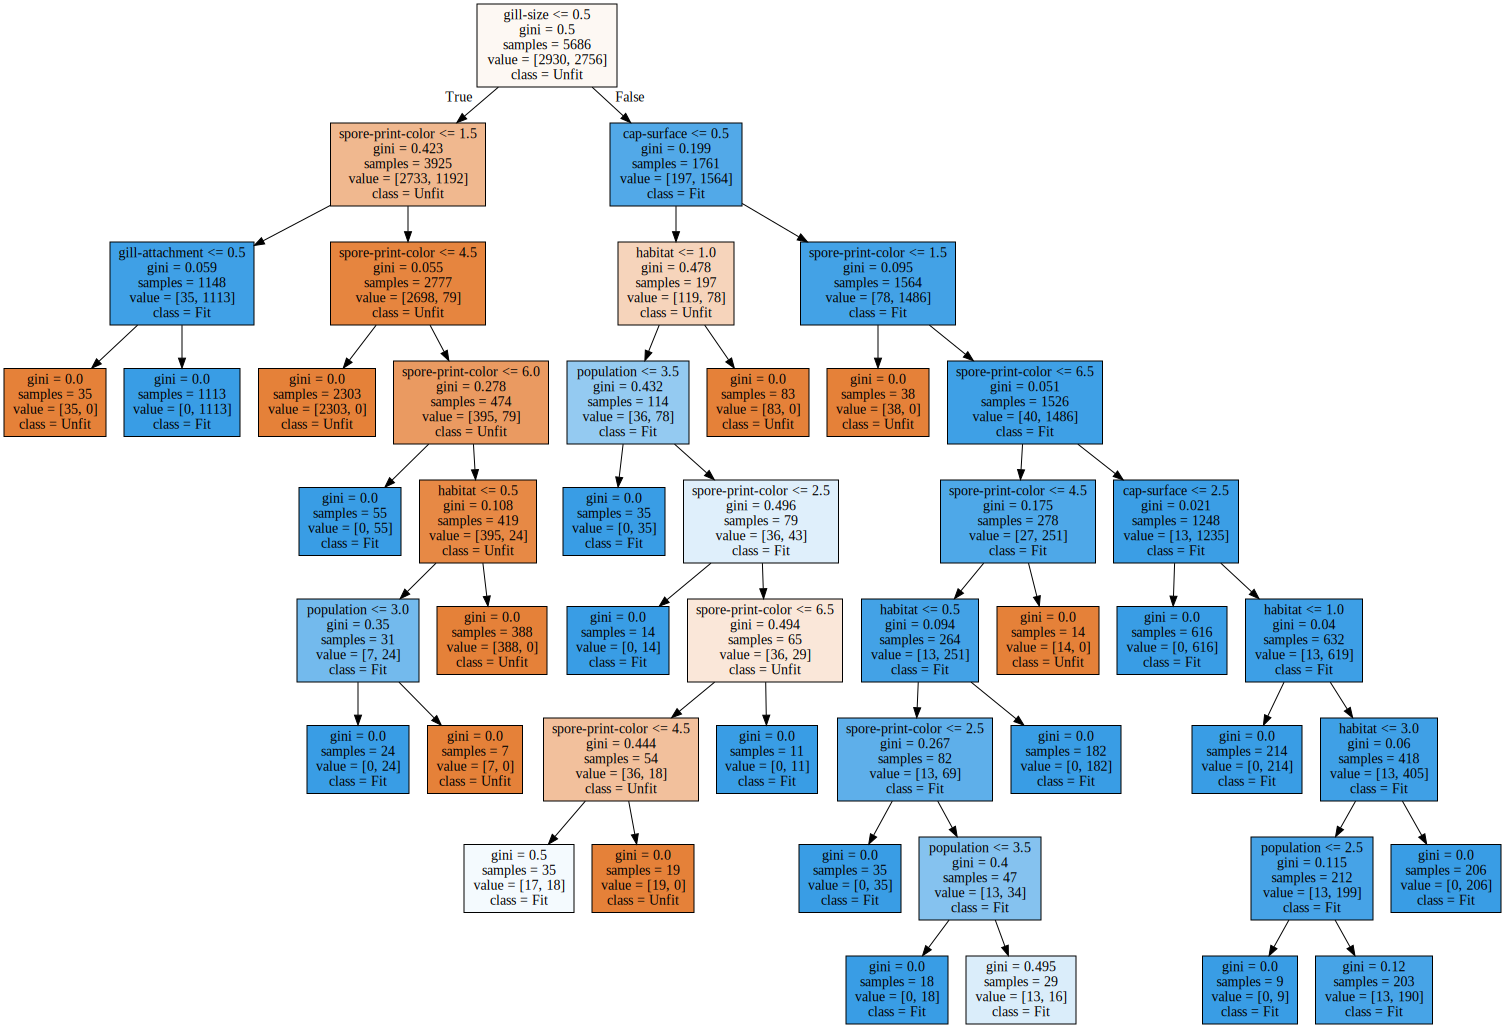

In [39]:
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(tree, all_x.columns.values, ['Unfit', 'Fit'])



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

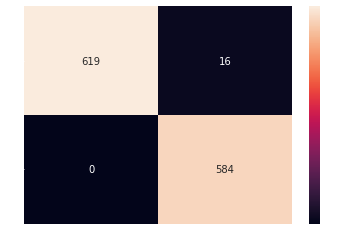

In [41]:
forest = RandomForestClassifier()
forest.fit(X_wtrain, y_wtrain)
scores.at['forest','train accuracy'] = forest.score(X_wtrain, y_wtrain)
scores.at['forest','validation accuracy'] = forest.score(X_wtest, y_wtest)
scores.at['forest','test accuracy'] = forest.score(X_wtest, y_wtest)

conf = confusion_matrix(y_wtest, forest.predict(X_wtest))
sns.heatmap(conf, annot=True, fmt="d")

In [43]:
scores.reindex(['knn','tree','forest'])

,train accuracy,validation accuracy,test accuracy
knn,0.992438,0.989336,0.986874
tree,0.992438,0.989336,0.986874
forest,0.992438,0.986874,0.986874


###I am satisfied with the results,it is surprised that all methods are with the same accuracy.

##split data with one hot encoding. 
I did not succses to use data that encoded by one-hot encoding is more hard and Complicated to apply.

##conclusion

To sum-up this assign, it was really hard to do it first time. 
Initially I did feature exploration in order to make the data easy to use and analyze.
After I predict the features I thought that are affected mostly on the results. 
I hope that my first job was good enough.
